In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [72]:
df=pd.read_csv('train.csv')
dft=pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/home/baba/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


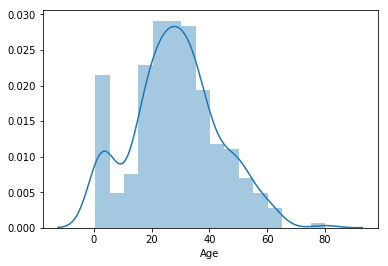

In [73]:
sns.distplot(df['Age'][(df['Survived']==1)].dropna())

In [74]:
def outlier_detector(df,n,features):
    out_list=[]
    for each in features:
        Q1=np.percentile(df[each],25)
        Q2=np.percentile(df[each],75)
        IQR=Q2-Q1
        outlier_step=1.5*(IQR)
        
        outlier_index_col=df[(df[each]<Q1-outlier_step) | (df[each]>Q2+outlier_step)].index
        out_list.extend(outlier_index_col)
    out_list=Counter(out_list)
    final_list=(k for k,v in out_list.items() if v>n)
    return final_list
out_to_drop=outlier_detector(df,2,['Age','SibSp','Parch','Fare'])
df.loc[out_to_drop]

/home/baba/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [75]:
df=df.drop(out_to_drop,axis=1).reset_index(drop=True)

In [76]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
df.fillna({
    'Age':np.median(df['Age'].dropna()),
    'Embarked':'S'
},inplace=True)
dft.fillna({
    'Age':np.median(df['Age'].dropna()),
    'Embarked':'S',
    'Fare':np.mean(df['Fare'][(df['Pclass']==3)&(df['Embarked']=='S')])
},inplace=True)

In [78]:
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df['Sex'])
df['Embarked']=lb.fit_transform(df['Embarked'])
dft['Sex']=lb.fit_transform(dft['Sex'])
dft['Embarked']=lb.fit_transform(dft['Embarked'])

In [79]:
X=df.drop(['Name','Ticket','Cabin','PassengerId','Survived'],axis=1).values
Y=df['Survived'].values
X_test=dft.drop(['Name','Ticket','Cabin','PassengerId'],axis=1).values

In [80]:
poly=PolynomialFeatures(degree=3)
X=poly.fit_transform(X)
X_test=poly.fit_transform(X_test)

In [81]:
X=scale(X)
X_test=scale(X_test)

In [82]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2)

In [83]:
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)
y_pred1=pd.Series(DT.predict(X_test),name="DT")
DT.score(X_val,Y_val)

0.776536312849162

In [84]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
y_pred2=pd.Series(RFC.predict(X_test),name="RFC")
RFC.score(X_val,Y_val)

0.8212290502793296

In [85]:
LR=LogisticRegression()
LR.fit(X_train,Y_train)
y_pred3=pd.Series(LR.predict(X_test),name="LR")
LR.score(X_val,Y_val)

0.8379888268156425

In [88]:
votingC=VotingClassifier([('RFC',RFC),('DT',DT),('LR',LR)],voting='hard')
votingC.fit(X_train,Y_train)
y_pred=votingC.predict(X_test)
votingC.score(X_val,Y_val)

/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8212290502793296

In [87]:

submission = pd.DataFrame({
        'PassengerId': dft['PassengerId'],
        'Survived': y_pred
    })

In [90]:
submission.to_csv('submit.csv',index=False)